<a href="https://colab.research.google.com/github/stalin246/Colab/blob/main/Regresion_Logistica_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importamos las librerias que vamos a utilizar.**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

**Cargamos nuestro dataset almacenado en github.**

In [ ]:
dataframe = pd.read_csv("https://raw.githubusercontent.com/VictorGuevaraP/Mineria-de-datos-2020/master/diabetes_m.csv", sep = ";", index_col=0, encoding='latin-1')
dataframe.head()

,NumeroEmbarazos,Concentrac.blucosa.plama,Presión.arterial.diastólica,Tríceps.espesor.del.pliegue.cutáneo,X2.horas.suero.insulina,Índice.de.masa.corporal,Función.pedigrí.de.la.diabetes,edad,resultado
n,,,,,,,,,
1,6,148,72.0,35.0,0.0,33.6,0.627,50,Positivo
2,1,85,66.0,29.0,0.0,26.6,0.351,31,Negativo
3,8,183,64.0,0.0,0.0,23.3,0.672,32,Positivo
4,1,89,NaN,23.0,94.0,28.1,0.167,21,Negativo
5,0,137,40.0,NaN,168.0,43.1,2.288,33,Positivo


**Modificamos nuesto dataset en la columna 'resultado'.**

In [ ]:
dataframe = pd.read_csv("https://raw.githubusercontent.com/VictorGuevaraP/Mineria-de-datos-2020/master/diabetes_m.csv", sep = ";", index_col=0, encoding='latin-1')
dataframe.fillna(0, inplace=True)
dataframe = pd.get_dummies(dataframe, drop_first=True)
dataframe.head()

,NumeroEmbarazos,Concentrac.blucosa.plama,Presión.arterial.diastólica,Tríceps.espesor.del.pliegue.cutáneo,X2.horas.suero.insulina,Índice.de.masa.corporal,Función.pedigrí.de.la.diabetes,edad,resultado_Positivo
n,,,,,,,,,
1,6,148,72.0,35.0,0.0,33.6,0.627,50,1
2,1,85,66.0,29.0,0.0,26.6,0.351,31,0
3,8,183,64.0,0.0,0.0,23.3,0.672,32,1
4,1,89,0.0,23.0,94.0,28.1,0.167,21,0
5,0,137,40.0,0.0,168.0,43.1,2.288,33,1


**Desplegamos informacion estadistica: la media, el desvio estandar, los valores minimos y maximos.**



In [ ]:
dataframe.describe()

,NumeroEmbarazos,Concentrac.blucosa.plama,Presión.arterial.diastólica,Tríceps.espesor.del.pliegue.cutáneo,X2.horas.suero.insulina,Índice.de.masa.corporal,Función.pedigrí.de.la.diabetes,edad,resultado_Positivo
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,61.494792,18.657552,71.100260,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,28.642926,16.279138,107.626723,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,58.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,70.000000,20.000000,0.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,78.000000,32.000000,115.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,680.000000,67.100000,2.420000,81.000000,1.000000


**Revisamos cuantos usuarios dieron positivo y negativo**

In [ ]:
print(dataframe.groupby('resultado_Positivo').size())

resultado_Positivo
0    500
1    268
dtype: int64


**Por medio de la grafica historial aplicada a las etiquetas(columnas) de nuestra base de datos podremos ver que valores estan en minimos y maximos, ademas el intervalo donde hay mas densidad.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


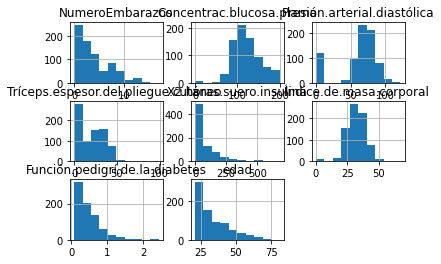

In [ ]:
dataframe.drop(['resultado_Positivo'],1).hist()
plt.show()

**Acontinuacion utilizamos la siguiente grafica para poder relacionar las entradas, de esta manera se puede distinguir como influye los resultados positivos en cada mujer embarazada.**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


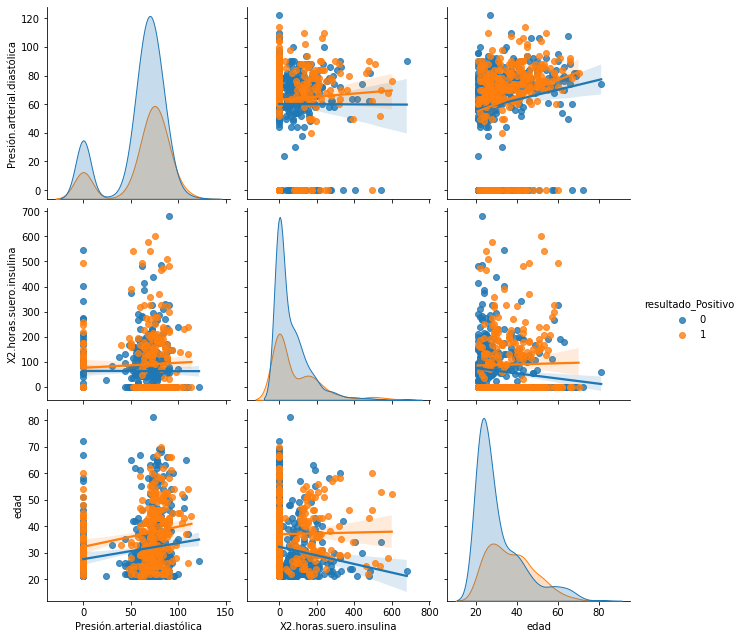

In [ ]:
sb.pairplot(dataframe.dropna(), hue='resultado_Positivo',size=3,vars=["Presión.arterial.diastólica",	"X2.horas.suero.insulina","edad"],kind='reg')

**Creamos el modelo de regresion, recordando que en la variable x van todas los datos de la columna que nos ayudaran a predecir el resultado de y.**

In [ ]:
X = dataframe.iloc[:, [0,1,2,3,4,5,6,7]].values #las etiquetas que ayudan a predecir
y = dataframe.iloc[:,8].values #resultado_positivo

**Dividmos el data train 60% y testing 40%**

In [ ]:
from pandas.core.common import random_state
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4,random_state=0)

**Instaciamos y ajustamos el modelo**

In [ ]:
#Instaciamos el modelo
regresionlogistica= LogisticRegression(solver='liblinear', max_iter=300)
#Ajustamos el modelo usando el trainning
regresionlogistica.fit(X_train,y_train)

LogisticRegression(max_iter=300, solver='liblinear')

**Utilizamos el modelo para realizar predicciones.**

In [ ]:
#Usamos el modelo para realizar las predicciones
y_pred = regresionlogistica.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,

***Analisis del modelo ***

In [ ]:
#Analisis del modelo(Matriz Confusion)
from sklearn import metrics
matriz_confusion = metrics.confusion_matrix(y_test,y_pred)
matriz_confusion

array([[192,  13],
       [ 52,  51]])

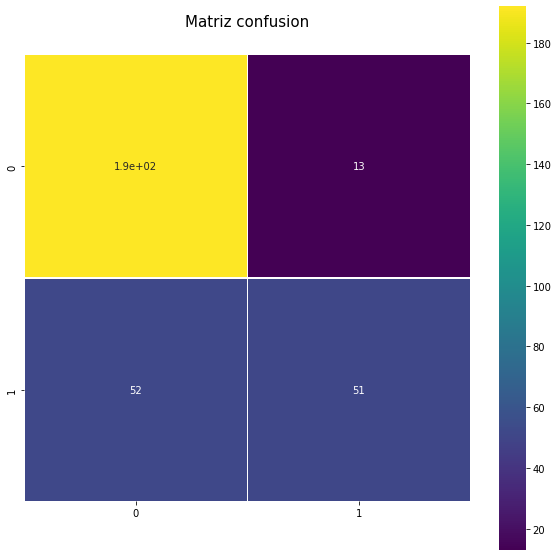

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
plt.title('Matriz confusion',Y=1.05, size=15)
colormap = plt.cm.viridis
sns.heatmap(matriz_confusion,linewidths=0.2,square=True, cmap=colormap, linecolor='white', annot=True)

**Determinamos la precision del modelo.**

In [ ]:
#Precision del modelo
print("Accurac:",metrics.accuracy_score(y_test,y_pred))

Accurac: 0.788961038961039


Ejemplo de la prediccion del modelo.

In [ ]:
#Realizamos un ejmplo del modelo
regresionlogistica.predict([[6,148,72.0,35.0,0.0,33.6,0.627,50]])#El resultado tiene que ser positivo(1)

array([1], dtype=uint8)

In [ ]:
regresionlogistica.predict([[1,89,0.0,23.0,94.0,28.1,0.167,21]])#El resultado tiene que ser negativo(0)

array([0], dtype=uint8)

In [ ]:
#Reporte final
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       205
           1       0.80      0.50      0.61       103

    accuracy                           0.79       308
   macro avg       0.79      0.72      0.73       308
weighted avg       0.79      0.79      0.77       308



#**Realizamos una matriz de confusion de todo el modelo de forma global**

In [ ]:
dataframe = pd.read_csv("https://raw.githubusercontent.com/VictorGuevaraP/Mineria-de-datos-2020/master/diabetes_m.csv", sep = ";", index_col=0, encoding='latin-1')
#dataframe = pd.get_dummies(dataframe['resultado'])
dataframe.fillna(0, inplace=True)
dataframe = pd.get_dummies(dataframe, drop_first=True)

In [ ]:
from sklearn.feature_selection import SelectKBest
df_data =dataframe
X=df_data.drop(['resultado_Positivo'],axis=1)
Y=df_data['resultado_Positivo']
best=SelectKBest(k=8)
X_new = best.fit_transform(X,Y)
X_new.shape
selected = best.get_support(indices=True)

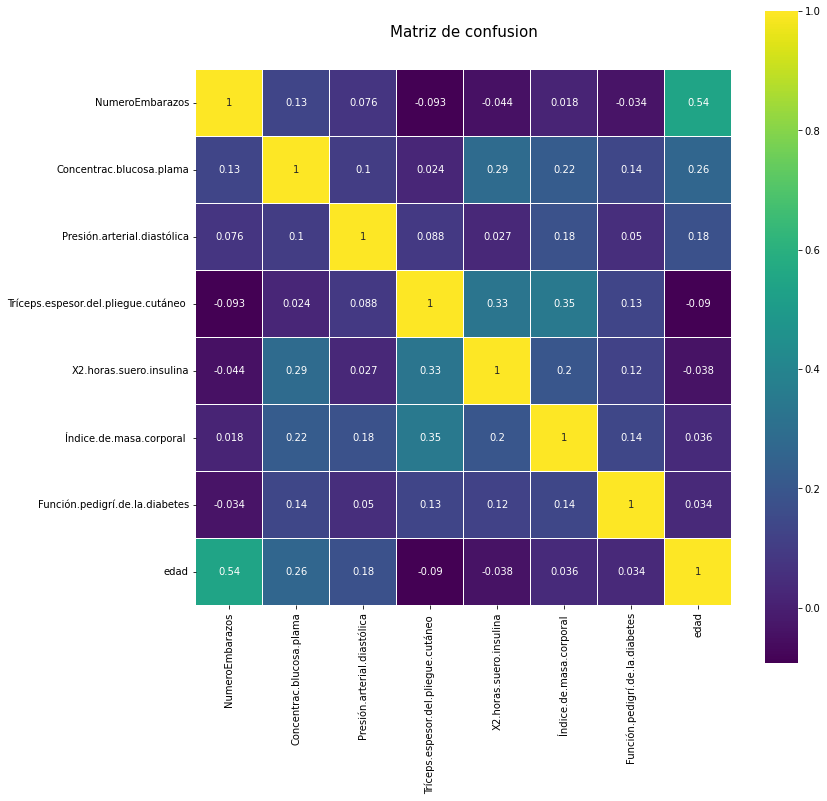

In [ ]:
used_features = X.columns[selected]
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Matriz de confusion',Y=1.05, size=15)
sns.heatmap(df_data[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0,square=True, cmap=colormap, linecolor='white', annot=True)